# Week 3 - Social Data Analysis, DTU
13-02-2024

## Part 1: Fundamentals of data visualization

Excercise: Questions for the lecture. Answer in your own words based on the video, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better.

**Question 1:**
As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

*Answer:* 

Pearson correlation measures the linear correlation between two data sets. 

- No correlation gives the value 0
- A perfect positive correlation where all points are on a line with a positive slope, gives the value 1
- A perfect negative correlation where all points are on a line with a negative slope, gives the value -1
- Anything less perfect, but positive correlation is between 0 and 1
- And same with negative between -1 and 0.

*Calculations?*

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f)

Explain ... 

*Example where it fails and visualisation works?*

Perhaps if the data varies in places, sometimes is much less, sometimes more, but overall still follows a fit?

Chat GPT says: If there is a non-linear correlation.

**Question 2:**
What is the difference between a bar-chart and a histogram?

*Answer:* 

A bar chart shows the values (amount) of each point or separate category.

A histogram has bins of interval, where we have to define the value of the number of bins. 

**Question 3**
I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.


I would probably aim after about 10-20 bins (or perhaps up top 50?), depending on the details of the data. I would round the data so that the lowest and highest bin balue would be divisible by 1, 10 or 100 etc, depending on the size of the numbers. 

Man kan vælge at lade python følge Rice reglen, som udregner antallet af bins som afhænger af antaller af punkter vi har til rådighed, som tredje rod af antal punkter, ganget med 2.

= Jo flere datapunkter, jo flere bins. Men det kan også blive for "fint" og mindre overskueligt med for mange bins.

Tager det på slum, og bedømmer ud fra histogrammets udseende ... 



## Part 2: Reading about the theory of visualization 

### Excercise: Questions for DAOST 
As always, try to answer without the help of your LLM and through reading the text, but feel free to add more nuance by asking it questions.

1. Explain in your own words the point of the jitter plot.


Answer: If many points have the same value, it will be easier to visualise the amount of the multiple instances of the same value.

It's a good idea to use open rings, because then it will be easier to see overlapping values, while not getting confused by straight lines in a cross or line.

2.  Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).


Answer: The point is, that the shape of a histagram can depend on how we chose the alignment and not only the size of bins. It seems to be especially in smaller data points and when the bins are rather large. 

3. The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading?


Answer: In KDE, if there are only slight differences in the values (heights) of the histagram bins, it might be harder to spot. The look and feel of a KDE is dependent of the bandwidth and it can be hard to see the specific amounts of occurencies for each interval.

4. Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?

Answer: It is easier to intitively see the distribution of values on a graph than culminitative values, because we are mostly used to see graphs that directly show a relation between points, and not culminitavely added values.

5. What is a Quantile plot? What is it good for.


Answer: Quantil plot is just like the culminative CDF, but the axis are switched, so it's like mirroring the graph in x=1. 

The quantile plot can be more useful if you want to check the amount of data points that is larger or smaller than a specific percentage value.

6. How is a Probablity plot defined? What is it useful for? Have you ever seen one before?


Answer: No, I have never seen a probability plot before. As far as I can se it is mostly useful for checking if a distribution is gassian (because then the probability plot will be linaer) and how much it deviates from the guassian distribution. 

7. One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better.

Answer: A mean doesn't really tell us how the data is distributed. There might be outliers, the data might be spread or close and it doesn't tell us anything about the amount of data. 

Using both a mean and a medium can tell os something about outliers or "skewed" distribution, but it still doesn't tell os whether data points are close together or spread, and if there are clusters and other local trends.

8. Sune loves box plots (but not enough to own one of these 😂). When are box plots most useful?

Box plots are useful for to see the main distribution (cluster) of data, and whethjer there are outliers. It will show us the data that lies between the 25 ands 75 percentile.

9. The book doesn't mention violin plots. Are those better or worse than box plots? Why?


Those seem to be a more detailed form for box plot. Almost like a KDE compared to a histogram. I would say that the further detail might be more confusing but perhaps better if if you want to see how data is distributed in the box plot.

10. Remember the box-plot part from this video from last time (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?


A violin plot would show the clustering behaviour and distribution in the box, hence dfifferentiating the content of a same-looking box.

Box-plots don't show how the data is distributed inside the 25-75-percentiles.

## Part 3: Visualizations based on the book

*Excercise Part 1:*
Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

For the two parts below, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask it for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc.



- Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. **So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example).** So let time run on the x-axis and create vertical jitter.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [64]:
#Crime-type: PROSTITUTION
#Time interval: Januar 2018
#Single hour: 22-23

df['Date'] = pd.to_datetime(df['Date'])

df_prostitution = df[df["Category"] == "PROSTITUTION"]

# Filter by year and month
df_prostitution = df_prostitution[df_prostitution["Date"].dt.year == 2017]
df_prostitution = df_prostitution[df_prostitution["Date"].dt.month.between(1,6)]

# Filter by time
df_prostitution = df_prostitution[df_prostitution['Time'].between('23:00', '23:59')]

df_prostitution.head()



,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
1214867,17046751013075,170467510,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Wednesday,2017-06-07,23:10,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
1217014,17037079713075,170370797,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Friday,2017-05-05,23:56,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
1239551,17035259113075,170352591,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Saturday,2017-04-29,23:27,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
1264000,17048948913075,170489489,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,2017-06-15,23:00,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
1323132,17046759813075,170467598,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Wednesday,2017-06-07,23:51,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0


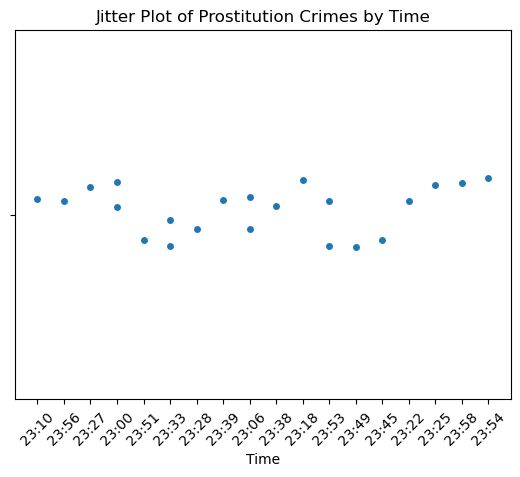

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.stripplot(y="Unit", x="Quality Score", data=df)

sns.stripplot(x='Time', data=df_prostitution, jitter=True, marker="o")

plt.xlabel('Time')
plt.title('Jitter Plot of Prostitution Crimes by Time')
plt.xticks(rotation=45)  # Rotate the x labels if necessary
plt.show()

- Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST Figure 2-2). I think the GPS data could be fun to see this way.
     - **This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)**
     - Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

In [65]:
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [113]:
# is X and Y geodata? Yes
print(df['X'].min(), df['X'].max())
print(df['Y'].min(), df['Y'].max())

#Latitude ('Y'): Ranges from -90 to 90. Breddegrader ... nord/syd

-122.51364206429 -120.5
37.7078790224135 90.0


In [112]:
df_gps = df[['Category', 'X', 'Y']]

df_gps

,Category,X,Y
0,ROBBERY,-122.420084,37.708311
1,VEHICLE THEFT,-120.500000,90.000000
2,VEHICLE THEFT,-120.500000,90.000000
3,ARSON,-122.436220,37.724377
4,ASSAULT,-122.410541,37.770913
...,...,...,...
2129520,DRUG/NARCOTIC,-122.398699,37.798880
2129521,ASSAULT,-122.443312,37.770470
2129522,OTHER OFFENSES,-122.387068,37.755446
2129523,OTHER OFFENSES,-122.412515,37.780478


In [162]:
#df["Category"].value_counts()

# Filter the DataFrame for the date range
df_date_filter = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]

# Count the number of incidents in each category
category_counts = df_date_filter['Category'].value_counts()

category_counts

Category
LARCENY/THEFT                  41980
OTHER OFFENSES                 20052
NON-CRIMINAL                   19098
ASSAULT                        11090
VEHICLE THEFT                   7935
VANDALISM                       7636
WARRANTS                        6724
BURGLARY                        5903
SUSPICIOUS OCC                  5435
DRUG/NARCOTIC                   4194
ROBBERY                         3697
MISSING PERSON                  3581
FRAUD                           3125
WEAPON LAWS                     1590
SECONDARY CODES                 1578
TRESPASS                        1395
STOLEN PROPERTY                  927
RECOVERED VEHICLE                913
FORGERY/COUNTERFEITING           761
SEX OFFENSES, FORCIBLE           740
DRUNKENNESS                      576
DISORDERLY CONDUCT               547
DRIVING UNDER THE INFLUENCE      428
PROSTITUTION                     370
ARSON                            309
KIDNAPPING                       277
EMBEZZLEMENT                 

In [171]:
#Let's pick Drug/Narcotic and Vandalism in the year 2003 ... we'll have between 1000 and 10000 incidents for each
df_date_crime_filter = df_date_filter[(df["Category"] == "DRUG/NARCOTIC") | (df_date_filter["Category"] == "VANDALISM")]

df_date_drugs = df_date_filter[(df["Category"] == "DRUG/NARCOTIC")]
df_date_vandalism = df_date_filter[(df["Category"] == "VANDALISM")]


/var/folders/l4/00sp3bws4vqggp0ltzbw1_9h0000gn/T/ipykernel_77803/1953480437.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_date_crime_filter = df_date_filter[(df["Category"] == "DRUG/NARCOTIC") | (df_date_filter["Category"] == "VANDALISM")]
/var/folders/l4/00sp3bws4vqggp0ltzbw1_9h0000gn/T/ipykernel_77803/1953480437.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_date_drugs = df_date_filter[(df["Category"] == "DRUG/NARCOTIC")]
/var/folders/l4/00sp3bws4vqggp0ltzbw1_9h0000gn/T/ipykernel_77803/1953480437.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_date_vandalism = df_date_filter[(df["Category"] == "VANDALISM")]


- Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST Figure 2-2). I think the GPS data could be fun to see this way.
     - This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
     - **Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.**

In [172]:
#Latitude ('Y'): Ranges from -90 to 90. Breddegrader ... nord/syd
#print(df_filtered['X'].min(), df_filtered['X'].max())
print(df_date_crime_filter['Y'].min(), df_date_crime_filter['Y'].max())

# dem med 90 breddegrader må være en fejl ... san francisco på Nordpolen? Måske var det julemanden? 
# Lad være med at vælge de tidligere år så ... der er lokationen ikke altid registreret og autofyldt med 90

37.7080034569459 37.8096707013239


In [168]:
df_date_crime_filter[df_date_crime_filter['Y'] != 90][["Category", "Date", "Time", "X", "Y"]].sort_values(by='Date')

,Category,Date,Time,X,Y
1221741,VANDALISM,2015-01-01,15:00,-122.467488,37.781826
1167170,VANDALISM,2015-01-01,12:00,-122.449771,37.764866
1249601,DRUG/NARCOTIC,2015-01-01,18:03,-122.419711,37.754557
1446579,VANDALISM,2015-01-01,15:00,-122.434151,37.798454
1648588,VANDALISM,2015-01-01,01:27,-122.400463,37.798599
...,...,...,...,...,...
1206427,VANDALISM,2015-12-31,05:35,-122.414523,37.780875
1194521,VANDALISM,2015-12-31,18:00,-122.450451,37.711448
1191758,VANDALISM,2015-12-31,10:00,-122.431029,37.765867
1213334,VANDALISM,2015-12-31,17:00,-122.428993,37.785726


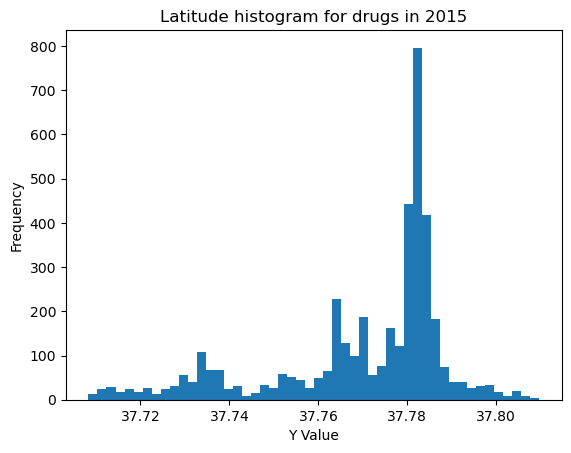

In [174]:
plt.hist(df_date_drugs['Y'], bins=50)  
plt.title('Latitude histogram for drugs in 2015')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

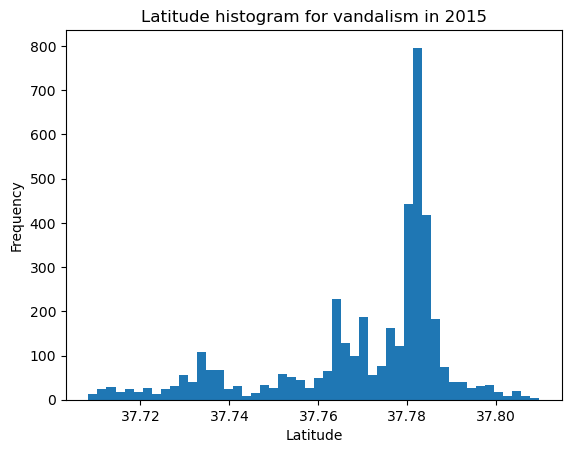

In [175]:
plt.hist(df_date_drugs['Y'], bins=50)  
plt.title('Latitude histogram for vandalism in 2015')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

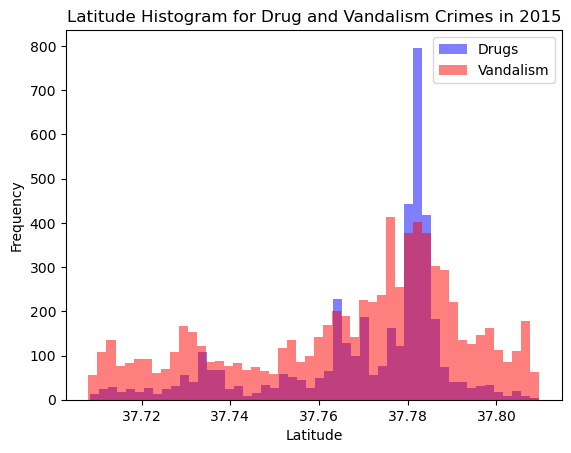

In [176]:
plt.hist(df_date_drugs['Y'], bins=50, color='blue', alpha=0.5, label='Drugs')
plt.hist(df_date_vandalism['Y'], bins=50, color='red', alpha=0.5, label='Vandalism')

plt.title('Latitude Histogram for Drug and Vandalism Crimes in 2015')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. Here, you'll finde a pandas based strategy, but you can also use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot. There is also another nice tutorial for KDE plots here. Or ask your LLM what it recommends.

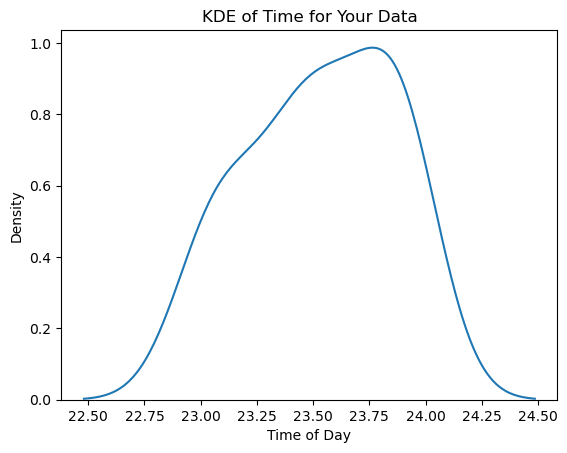

In [181]:
# For example, convert HH:MM to hours as a float
df_prostitution['Time_as_number'] = df_prostitution['Time'].apply(lambda t: int(t.split(':')[0]) + int(t.split(':')[1])/60)

# Create the KDE plot
sns.kdeplot(data=df_prostitution, x='Time_as_number')

# Customize the plot
plt.title('KDE of Time for Your Data')
plt.xlabel('Time of Day')
plt.ylabel('Density')

# Display the plot
plt.show()

Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?


In [188]:
df_date_drugs

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
30523,15082288716110,150822887,16110,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,Saturday,2015-09-19,14:31,TENDERLOIN,"ARREST, BOOKED",...,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,NaN,21.0
63521,15082288716120,150822887,16120,DRUG/NARCOTIC,SALE OF HEROIN,Saturday,2015-09-19,14:31,TENDERLOIN,"ARREST, BOOKED",...,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,NaN,21.0
924586,15082335216100,150823352,16100,DRUG/NARCOTIC,POSSESSION OF HEROIN,Saturday,2015-09-19,17:12,MISSION,"ARREST, BOOKED",...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,53.0
1032325,15082340916620,150823409,16620,DRUG/NARCOTIC,POSSESSION OF COCAINE,Saturday,2015-09-19,18:21,TENDERLOIN,"ARREST, BOOKED",...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
1127638,15103024716660,151030247,16660,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE,Friday,2015-11-27,10:20,TENDERLOIN,"ARREST, BOOKED",...,18.0,1.0,18.0,6.0,2.0,1.0,1.0,1.0,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031642,15060622716710,150606227,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,2015-07-12,07:37,BAYVIEW,"ARREST, BOOKED",...,13.0,NaN,13.0,NaN,2.0,NaN,NaN,NaN,61.0,86.0
2044145,15074213816040,150742138,16040,DRUG/NARCOTIC,SALE OF MARIJUANA,Monday,2015-08-24,20:00,SOUTHERN,"ARREST, BOOKED",...,NaN,1.0,NaN,7.0,2.0,1.0,1.0,1.0,35.0,20.0
2044837,15014735616710,150147356,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,2015-02-17,15:07,CENTRAL,"ARREST, BOOKED",...,12.0,NaN,12.0,5.0,2.0,NaN,NaN,NaN,NaN,19.0
2045644,15037281016030,150372810,16030,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Wednesday,2015-04-29,13:32,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,91.0


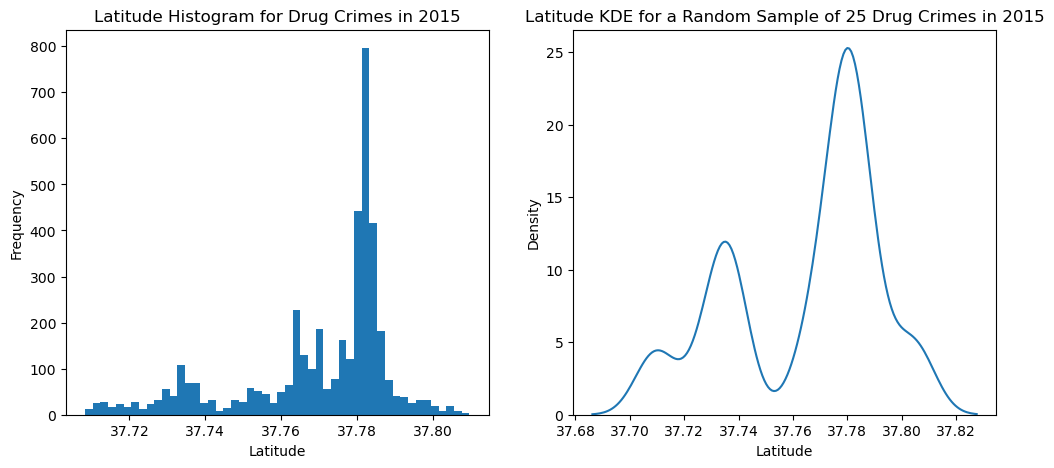

<Figure size 640x480 with 0 Axes>

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# Histogram on the first subplot
axs[0].hist(df_date_drugs['Y'], bins=50)
axs[0].set_title('Latitude Histogram for Drug Crimes in 2015')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Frequency')

# KDE on the second subplot
# Take a random sample of 25 points from df_date_drugs for the KDE plot
sampled_df = df_date_drugs.sample(n=25)
sns.kdeplot(sampled_df['Y'], bw_adjust=0.5, ax=axs[1])  # Adjust bw_adjust as needed
axs[1].set_title('Latitude KDE for a Random Sample of 25 Drug Crimes in 2015')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Density')

# Customizing the plot
plt.title('Latitude KDE for a Random Sample of 25 Drug Crimes in 2015')
plt.xlabel('Latitude')
plt.ylabel('Density')

# Display the plot
plt.show()


# Display the combined plot
plt.tight_layout()  # Adjust the spacing between plots
plt.show()


The resulting KDE based on samples of 25 really depends on the sample size. But if I take all the values, I thionk it kind of looks great? I'm not gonna diss KDE based on sample limitations ... 


*Excercise Part 2:*

- Now we'll work on creating two versions of the plot in Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.

**Hint:** Take a look at the scipy.stats.probplot function.